<h1>Place a few images on the same slide</h1>

<div>
<div style="float:left; width:30%"><img src="./img/sparrow.jpg" alt="Dat Tran!"></div>
<div style="float:left; width:30%"><img src="./img/CT_robin.jpg" alt="Dat Tran!"></div>
<div style="float:left; width:30%"><img src="./img/hummingbird.jpg" alt="Dat Tran!"></div>
</div>


<div class="latex_formulas">
    <h1><a  href="https://en.wikibooks.org/wiki/LaTeX/Advanced_Mathematics" target="_blank" >Useful Latex Formulas</a></h1>
<div style="float:left; width:45%">
<h5>changing font size</h5>
<br>
\begin{equation}
  x = a_0 + \frac{1}{\displaystyle a_1 
          + \frac{1}{\displaystyle a_2 
          + \frac{1}{\displaystyle a_3 + a_4}}}
\end{equation}
</div>
<div style="float:right; width:45%">
<h5>Align  and multiline subscripts</h5>
    <br>
\begin{align}
 f(x) &= (x+a)(x+b) + \prod_{\substack{
            1\le i \le n\\
            1\le j \le m}}
     M_{i,j}\\
      &= x^2 + (a+b)x + ab + \prod_{\substack{
            1\le i \le n\\
            1\le j \le m}}
     M_{i,j}
\end{align}
</div>
<div style="clear:left; float:left; width:45%">
<h5>Boxing Equations</h5>
    <br>
\begin{equation}
 \boxed{\overbrace{
   \underbrace{x}_\text{real} + i
   \underbrace{y}_\text{imaginary}
  }^\text{complex number}}
\end{equation}
</div>
<div style="float:right; width:45%">
<h5>Cases</h5>
    <br>
\[
 u(x) = 
  \begin{cases} 
   \exp{x} & \text{if } x \geq 0 \\
   1       & \text{if } x < 0
  \end{cases}
\]
</div>
</div>

In [1]:
from IPython.display import HTML
from IPython.display import IFrame

import sys
import os
import matplotlib.pylab as plt
import pandas as pd
import numpy as np


sys.path.append(".")
from seminar_utils import *
#os.getcwd()
#sys.path

In [2]:
df1 = pd.read_csv("./test_data/stats.csv", index_col=0)
df2 = pd.read_csv("./test_data/stats _tier2_header.csv", index_col=0)
kwargs = {'max-width': '120px', 'font-size': '10pt'}
df3 = df1.iloc[:3,:2]
u=  df3.style.set_caption("Descriptive Statistics For Unsmoothed Yields")\
    .set_precision(3)\
    .format({'AC(1)': "{:0.2f}",'AC(12)': "{:0.2f}", 'AC(36)': '{:.2f}'})\
    .set_table_styles(stats_table_observed_yield())

header = "<h1>Many Small Tables on the same slide</h1>"
u1 = "<div style='float:left; width:45%;'>{}</div>".format(u.render())
u2 = "<div style='float:right; width:45%;'>{}</div>".format(u.render())
u3 = "<div style='clear:left; float:left; width:45%;'>{}</div>".format(u.render())
u4 = "<div style='float:right; width:45%;'>{}</div>".format(u.render())
u4 = "<div>{}</div>".format(header + u1+u2+u3+u4)

HTML(u4)

,Mean1,Stdev2
0.25,5.63,1.49
0.5,5.78,1.48
0.75,5.91,1.49
,Mean1,Stdev2
0.25,5.63,1.49
0.5,5.78,1.48
0.75,5.91,1.49
,Mean1,Stdev2
0.25,5.63,1.49
0.5,5.78,1.48


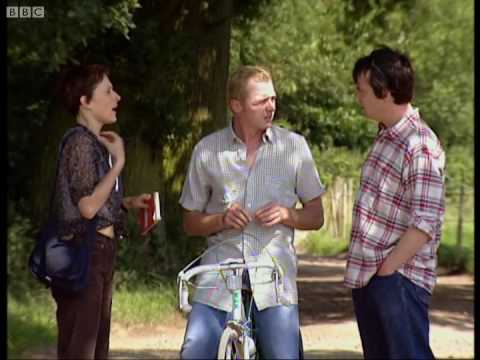

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('8cwWgxbqah0')

<div>
<h1>Bokeh</h1>
<a href="https://www.youtube.com/watch?v=9FlUFLmaWvY" target="_blank">
<img src="img/content_image/bokeh_sara_bird.png" alt="sard_bird_youtube_link" width="50%" height="50%" align-text="center">
</a>
</div>

In [4]:
from bokeh_utils import *

In [5]:
IFrame('buttons.html', width=700, height=500)

In [6]:
p = periodic_table()

In [7]:
"""reset_output()
output_file("periodic.html", title="an example")
save(p)
IFrame('periodic.html', width=700, height=500)"""
reset_output()
output_notebook()
show(p, notebook_handle=True)

Loading BokehJS ...

In [8]:
plot, toggle1, toggle2 = flip_flop_buttons()

In [9]:
layout = column(toggle1, toggle2, plot)
reset_output()
output_notebook()
show(layout)

Loading BokehJS ...

In [10]:
layout = a_little_dashboard()

In [11]:
reset_output()
output_notebook()
show(layout, notebook_handle=True)

Loading BokehJS ...

<h1  style="text-align:center;"><a href="http://mpld3.github.io/examples/custom_plugin.html" target="_blank">mpld3</a></h1>

In [12]:
import mpld3
from mpld3_utils import *

#the following line is important to make sure the interactive plot appears in the note book
mpld3.enable_notebook()

def create_random_walk():
    N_paths = 50
    N_steps = 100

    x = np.linspace(0, 10, 100)
    y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
    y = y.cumsum(1)

    fig, ax = plt.subplots(subplot_kw={'xticks': [], 'yticks': []}, figsize=(16, 10))
    lines = ax.plot(x, y.T, color='blue', lw=4, alpha=0.1)
    plugins.connect(fig, HighlightLines(lines))

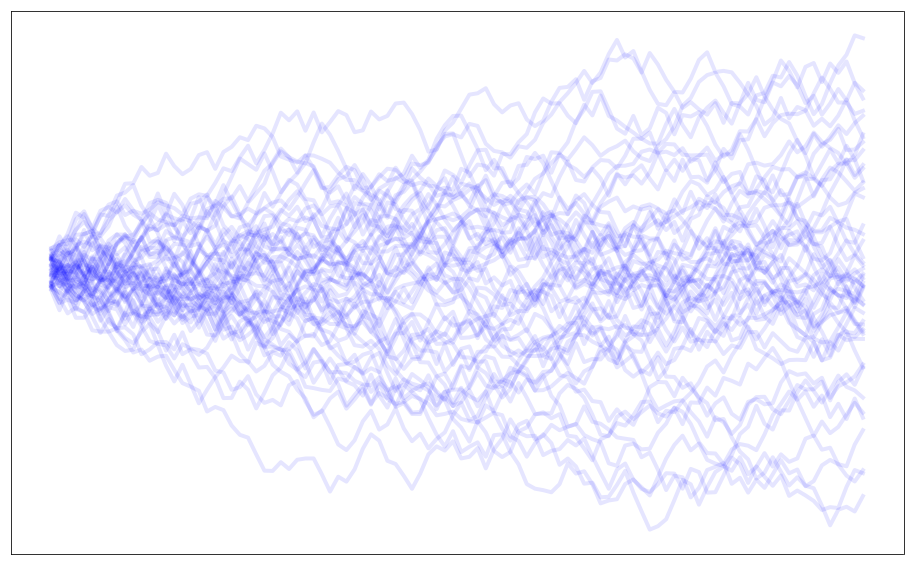

In [13]:
create_random_walk()

In [14]:
#good hack from JavadBa
import json
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        import numpy as np
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)
from mpld3 import _display
_display.NumpyEncoder = NumpyEncoder

In [15]:
def create_linked_views():
    fig, ax = plt.subplots(2)

    # scatter periods and amplitudes
    np.random.seed(0)
    P = 0.2 + np.random.random(size=20)
    A = np.random.random(size=20)
    x = np.linspace(0, 10, 100)
    data = np.array([[x, Ai * np.sin(x / Pi)]
                     for (Ai, Pi) in zip(A, P)])
    points = ax[1].scatter(P, A, c=P + A,
                           s=200, alpha=0.5)
    ax[1].set_xlabel('Period')
    ax[1].set_ylabel('Amplitude')

    # create the line object
    lines = ax[0].plot(x, 0 * x, '-w', lw=3, alpha=0.5)
    ax[0].set_ylim(-1, 1)

    ax[0].set_title("Hover over points to see lines")

    # transpose line data and add plugin
    linedata = data.transpose(0, 2, 1).tolist()
    plugins.connect(fig, LinkedView(points, lines[0], linedata))

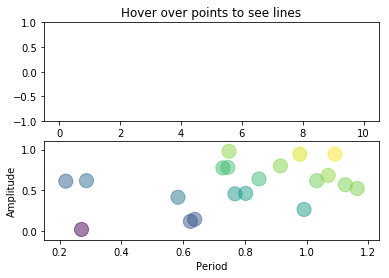

In [16]:
create_linked_views()

# Regular Expressions

In [17]:
import re
content = "somestuff_____XXsomeotherstuffZ___someothersyff____XotherotherotherZ__yes_manymanymoreZ"
#content = "somestuff_____XXXXXsomeotherstuffZ___someothersyffotherotherotherZZZZ__yes"
content = re.sub(r"(X)(X.*?Z)",r"\1R", content)
#content = re.sub(r"(XX.*?Z)",r"RRR", content)
#content = re.sub(r"(X.*?Z)",r"", content)
#content = re.sub(r"RRR",r"X", content)
content

'somestuff_____XR___someothersyff____XotherotherotherZ__yes_manymanymoreZ'

In [18]:
content = re.sub("XX","XRX", content)
content = re.sub(r"(RX.*?Z)",r"X", content)
content = re.sub(r"(XX.*?X)(.*?Z)",r"\1", content)
content
content = re.sub(r"(.*?X)(.*?Z)",r"\1", content)
content

'somestuff_____X__yes_manymanymoreZ'

In [19]:
0.1+0.2

0.30000000000000004

* next: create the html slides in two ways css from seminar_utils
* css from css file
* use a simple table and try to place a bunch of them next to each other
* how to show a text by hovering over a cell (jQuery?!! ask engineering people

$f_1=2$

<h1><a href="#/0/0">Click to go back to the beginning of your journey</a></h1>